<a href="https://colab.research.google.com/github/Ankushsaini90/-Bank-Marketing-Effectiveness-Prediction-/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

#**Mounting drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install klib

     |████████████████████████████████| 132 kB 6.9 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import klib
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
#file path reading or csv upload to coolab from drive (seperated = ;)
file_path='/content/bank-full.csv'     
data=pd.read_csv(file_path, sep = ";")

# ***EDA*** 

In [18]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [20]:
#Checking shape of data.
print("Rows - ", data.shape[0])
print("Columns - ", data.shape[1])

Rows -  45211
Columns -  17


***Checking null and duplicates value***

In [21]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [22]:
data.duplicated().sum()

0

*So we don't have any null or duplicate values.*

In [23]:
# Describing data 
data.describe(include='all')#.transpose()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [24]:
#checking info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


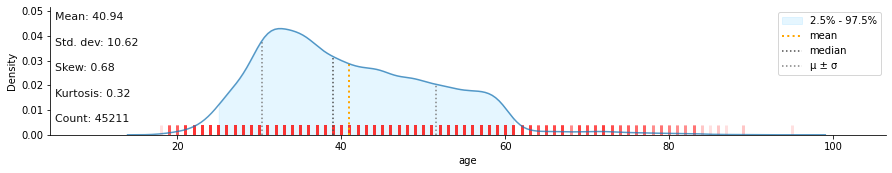

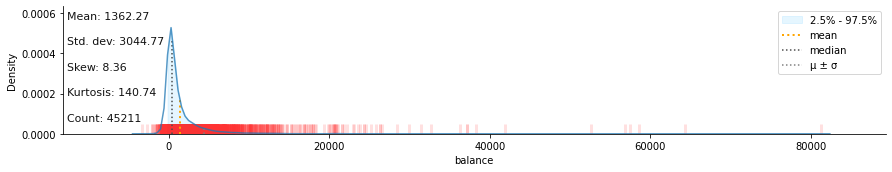

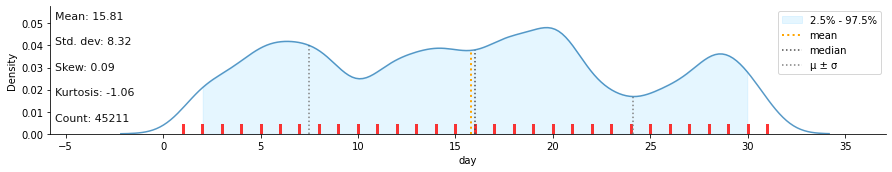

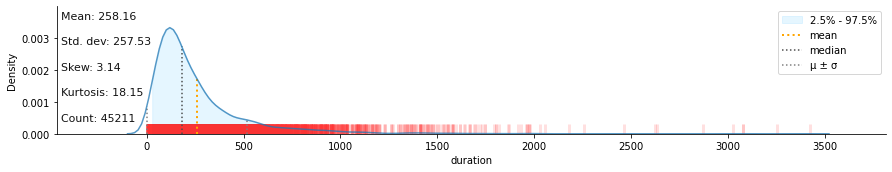

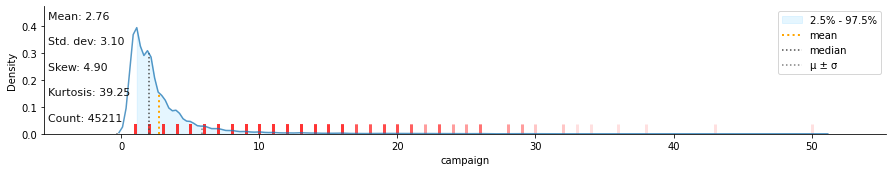

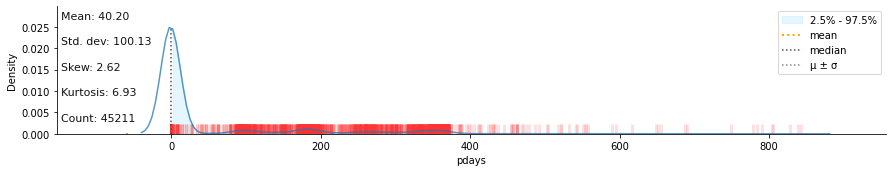

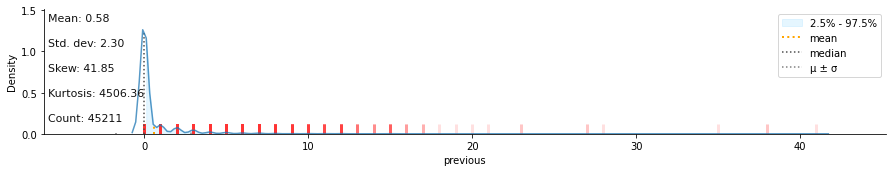

In [25]:
# distribution plot
klib.dist_plot(data)

So from above graphs we conclude that some columns have outliers which should be removed.

**Categorical columns**

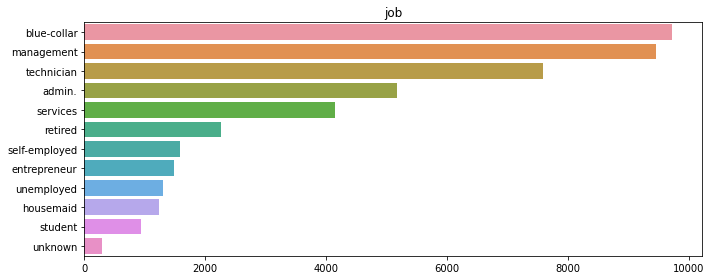

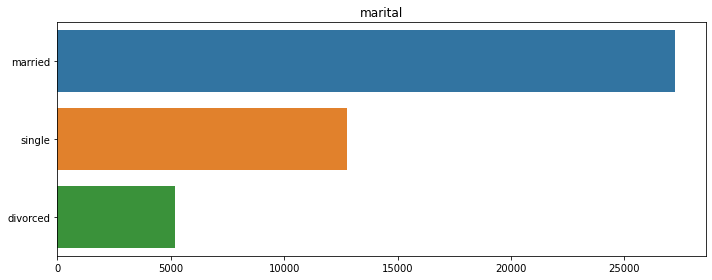

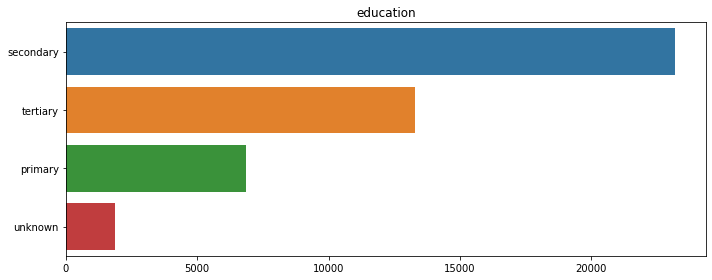

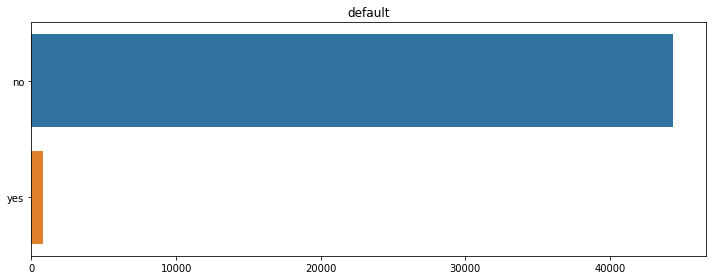

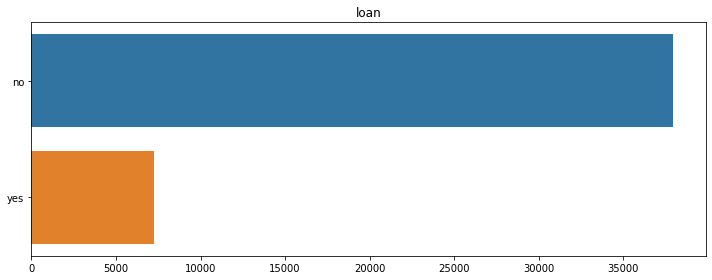

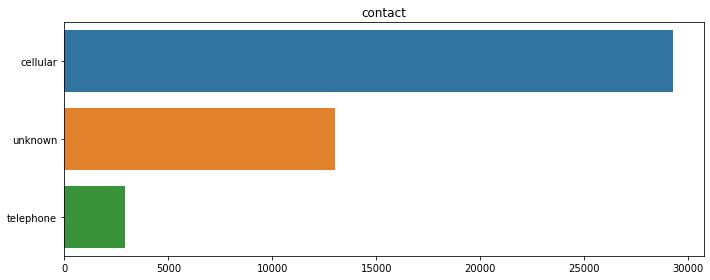

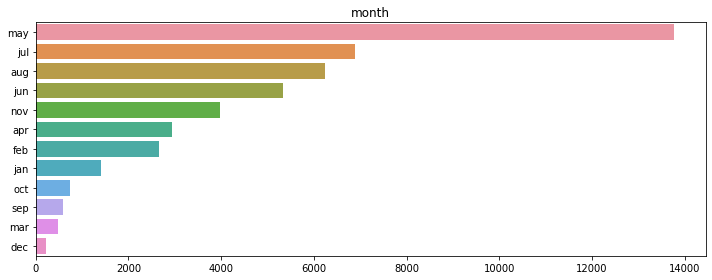

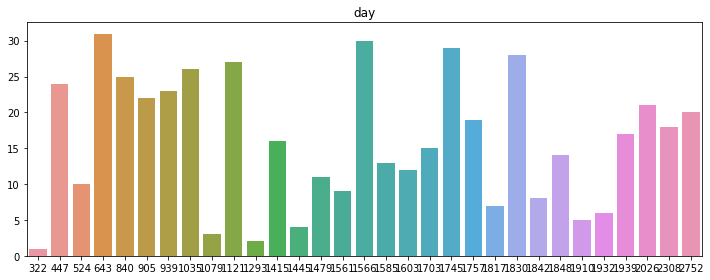

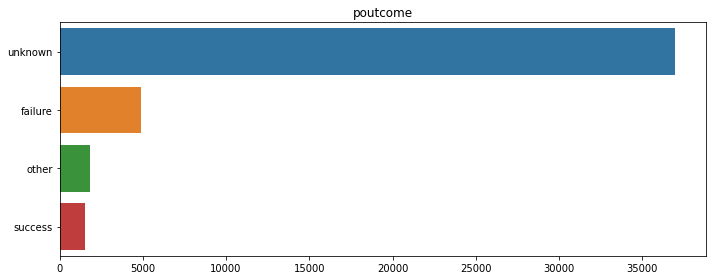

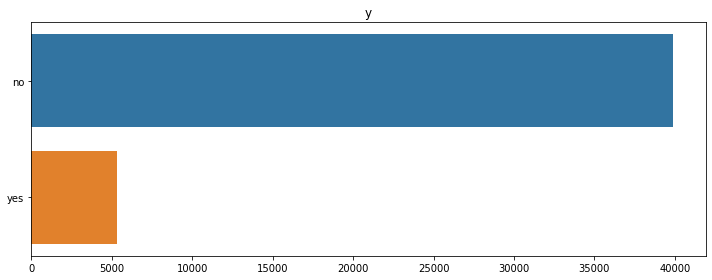

In [26]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

 **Analysis All Columns With Target variable**

***1.Age***

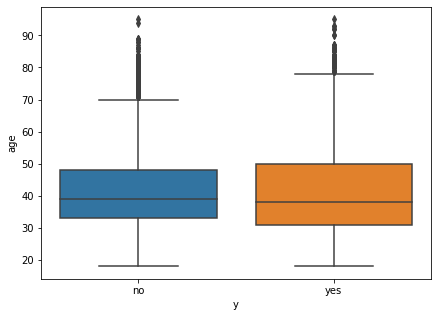

In [27]:
# Plotting the box plot 
plt.figure(figsize=(7,5))
sns.boxplot(y='age',x="y", data= data)
plt.show()

**Observation**- From above plot it is clear that a majority of customers called is in the age of 30s to 40s.

***2.Job***

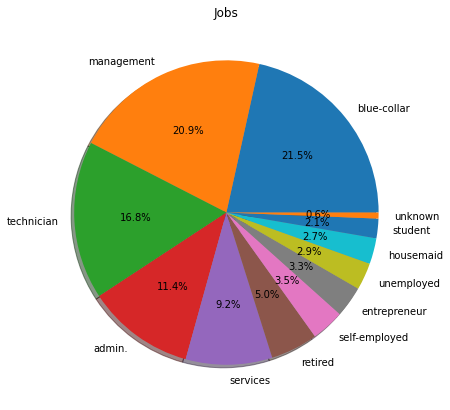

In [28]:
#pie plot of job 
plt.figure(figsize=(7,7))
plt.pie(data.job.value_counts(),labels=data.job.value_counts().index,shadow = True,autopct='%1.1f%%')
plt.title('Jobs')
plt.show()
 

In [29]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

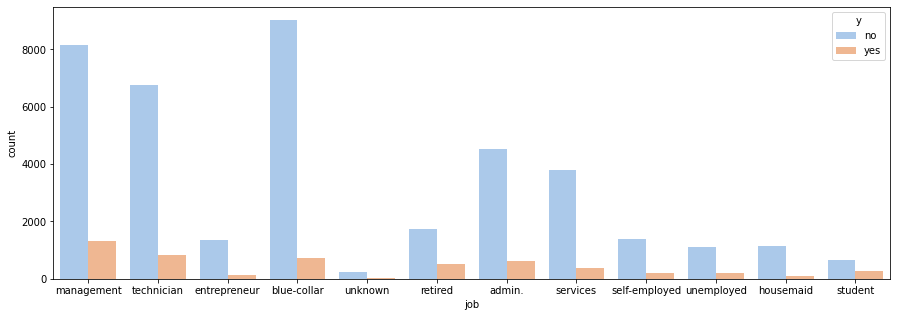

In [30]:
#Lets explore the count of accept and reject term deposit on the basis of different type of job 
fig, ax = plt.subplots(figsize=(15,5))
#sns.countplot(data.job, ax=ax, palette='pastel')
sns.countplot(data.job, hue=data.y,ax=ax, palette='pastel')

**Observation** - Blue-collar, management and technician  showed maximum interest in subscription.

***3. Martial status***

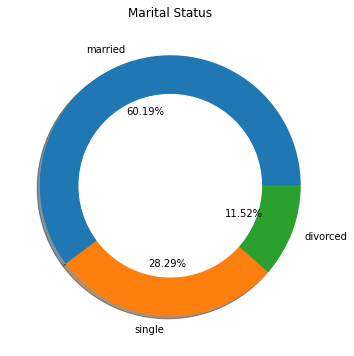

In [31]:
#Lets see pie plot of Martial status 
plt.figure(figsize=(6,6))
plt.pie(data.marital.value_counts(),labels=data.marital.value_counts().index,autopct='%1.2f%%',shadow = True)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Marital Status')
plt.show()

In [32]:
data.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Text(0.5, 1.0, 'Count of yes and no for different category of marital status')

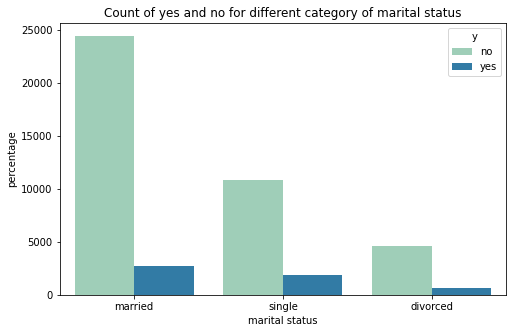

In [33]:
#Lets explore the count of accept and reject term deposit on the basis of different type of marital status
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.marital, hue=data.y,ax=ax, palette='YlGnBu')
plt.xlabel('marital status',fontsize=10)
plt.ylabel('percentage',fontsize=10)
plt.title('Count of yes and no for different category of marital status')

**Observation** - Married and Single have more intrest in deposite.

***4.Education***

Text(0.5, 1.0, 'Count of yes and no for different education level')

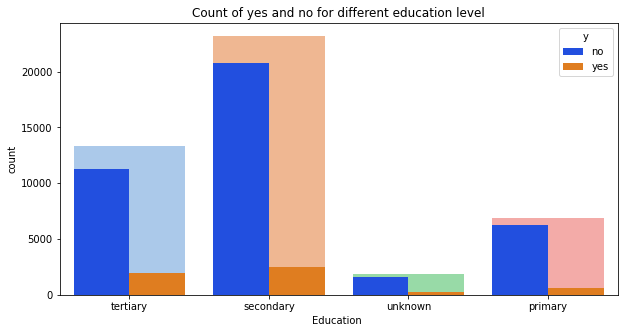

In [34]:
# deposit term on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data.education, ax=ax, palette='pastel')
sns.countplot(data.education, hue=data.y,ax=ax, palette='bright')
plt.xlabel('Education ')
plt.title('Count of yes and no for different education level')

**Observation** - People with secondary and tertiary education were more driven towards paying term deposit in bank as comparison to primary, tertiary  and some unknown education.

***5.Default***

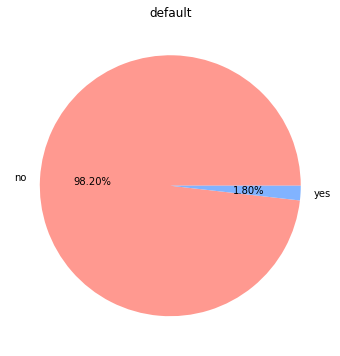

In [35]:
#Lets see pie plot of default 
plt.figure(figsize=(6,6))
colors = ['#ff9990','#81b3ff']
plt.pie(data.default.value_counts(),labels=data.default.value_counts().index,autopct='%1.2f%%',colors=colors)

plt.title('default')
plt.show()


Text(0.5, 1.0, 'Count of yes and no for default category')

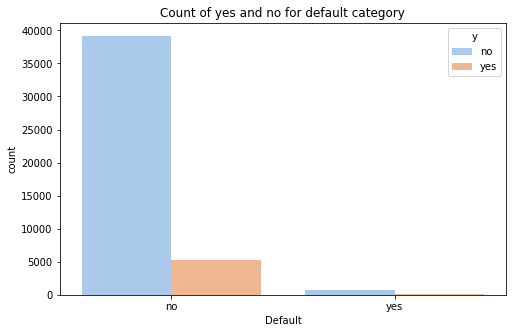

In [36]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.default, hue=data.y,ax=ax, palette='pastel')
plt.xlabel('Default')
plt.title('Count of yes and no for default category')

**Observation** - Genrally people don't have credit in default.

***6.Housing Loan***

Text(0.5, 1.0, 'Count of yes and no for house loan category')

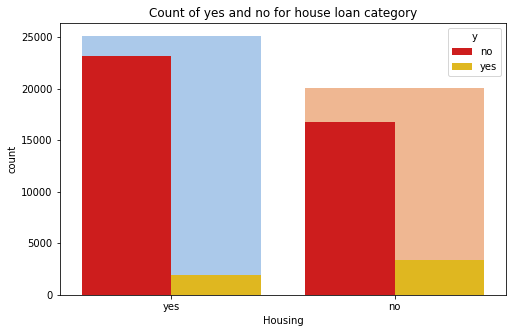

In [37]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.housing, ax=ax, palette='pastel')
sns.countplot(data.housing, hue=data.y,ax=ax, palette='hot')
plt.xlabel('Housing')
plt.title('Count of yes and no for house loan category')

**Observation** - Most of the people have home loan but only few of them opted for term deposit.

***7.Personal Loan***

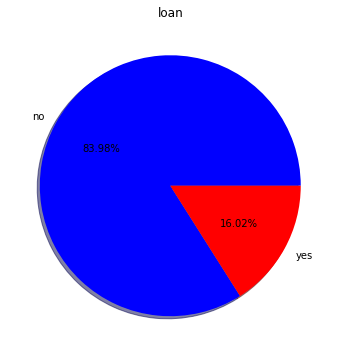

In [38]:
#Lets see pie plot for loan
plt.figure(figsize=(6,6))
plt.pie(data.loan.value_counts(),labels=data.loan.value_counts().index,autopct='%1.2f%%',shadow= True, colors='bright')
plt.title('loan')
plt.show()


Text(0.5, 1.0, 'Count of yes and no for personal loan category')

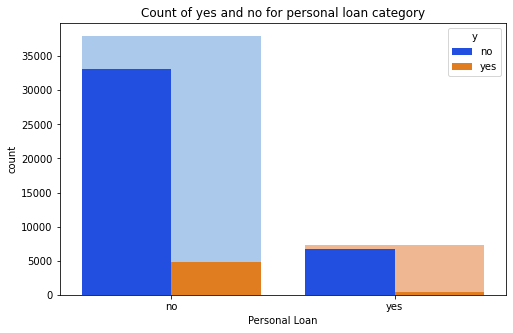

In [39]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.loan, ax=ax, palette='pastel')
sns.countplot(data.loan, hue=data.y,ax=ax, palette='bright')
plt.xlabel('Personal Loan')
plt.title('Count of yes and no for personal loan category')

**Observation** - Majority of the people have not personal loans and thus very few of them opted for term deposit.

***8.Contact***

Text(0.5, 1.0, 'Count of yes and no for contact category')

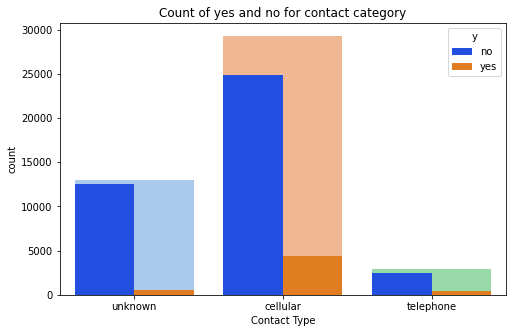

In [40]:
#Lets explore the count of accept and reject term deposit on contact type
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.contact, ax=ax, palette='pastel')
sns.countplot(data.contact, hue=data.y,ax=ax, palette='bright')
plt.xlabel('Contact Type')
plt.title('Count of yes and no for contact category')

**Observation** - Cellular communication is more effective in comparison to other communication types.

***9.Months***

In [41]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Text(0.5, 1.0, 'Count of yes and no for every month')

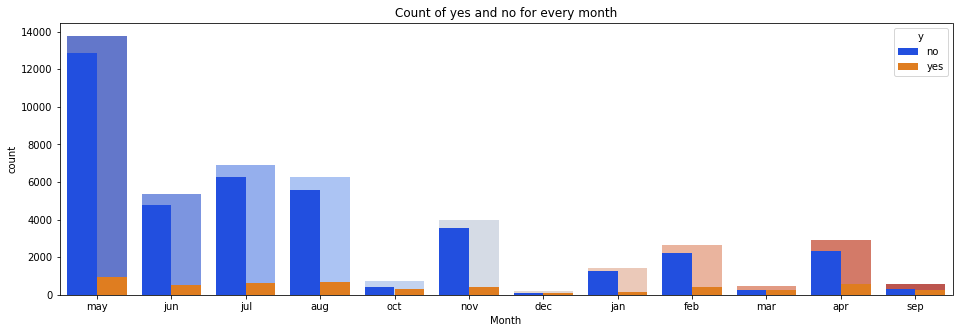

In [42]:
#Lets explore the count of accept and reject term deposit every month
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(data.month,palette='coolwarm')
sns.countplot(data.month, hue=data.y,ax=ax, palette='bright')
plt.xlabel('Month')
plt.title('Count of yes and no for every month')


**Observation** - There were maximum subscriptions in the month of may.
                



***10. Duration***

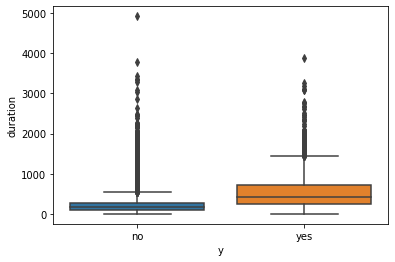

In [43]:
sns.boxplot(y='duration',x="y", data= data)

**Observation** - The above box plot shows that calls with large duration has more tendency for conversion

***11. Campaign*** 

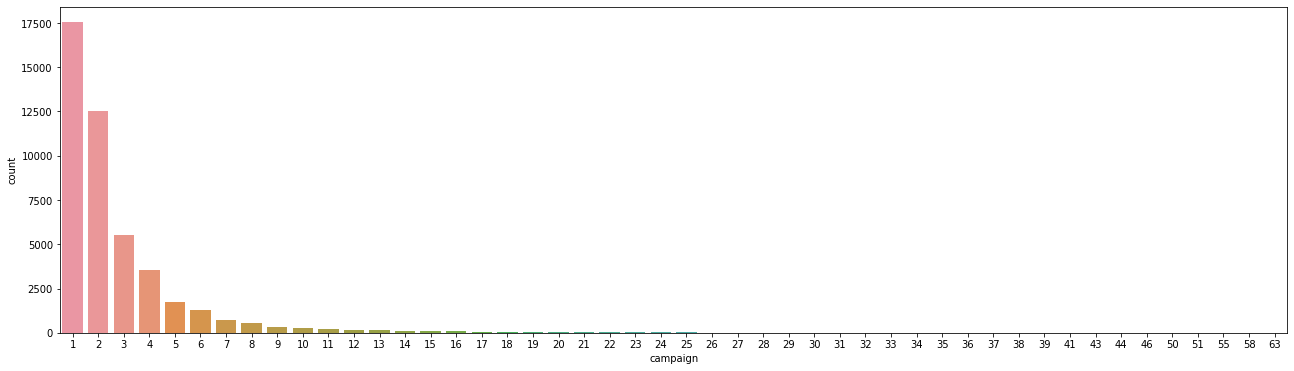

In [44]:
#Countplot of various number of contact were perfomed to how many people
plt.figure(figsize=(22,6))
sns.countplot(data['campaign'])
plt.show()


**Observation** - People were mostly contacted once but also some people also connect more number of time.

***12.Pday***

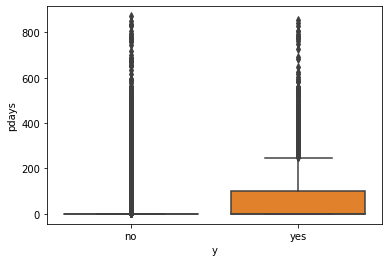

In [45]:
sns.boxplot(y='pdays',x="y", data= data)

***13. Previous***

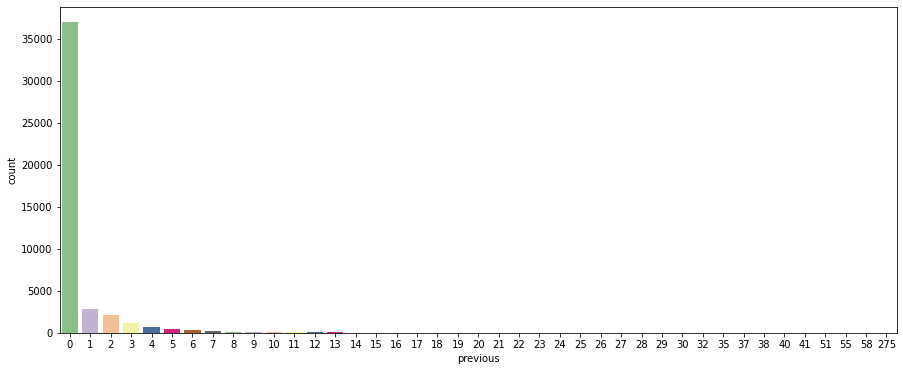

In [46]:
#Ploting countplot of previous feature
plt.figure(figsize=(15,6))
sns.countplot(data['previous'] ,palette="Accent")
plt.show()

**Observation** - We can see above that majority of people were not contacted previously before this campaign and there are no significant contacts after 11 times already done.

***14. Poutcome*** 

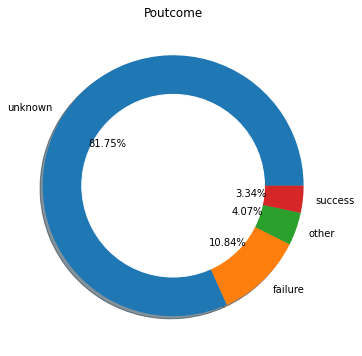

In [47]:
#Lets see pie plot 
plt.figure(figsize=(6,6))
plt.pie(data.poutcome.value_counts(),labels=data.poutcome.value_counts().index,autopct='%1.2f%%',shadow = True)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Poutcome')
plt.show()

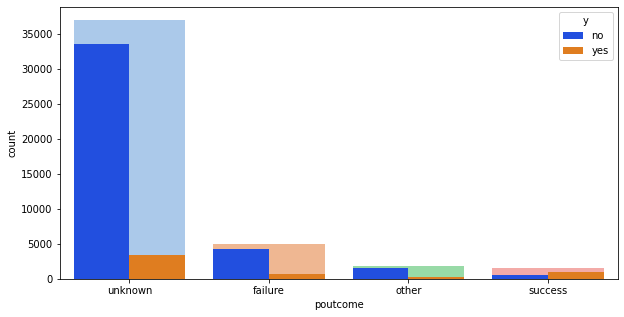

In [48]:
#Lets explore the count of accept and reject term deposit on the basis of poutcome
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data.poutcome, ax=ax, palette='pastel')
sns.countplot(data.poutcome, hue=data.y,ax=ax, palette='bright')

**Observation** - Success rate is high for unknown poutcome.

***15.Deposit (target variable)*** 

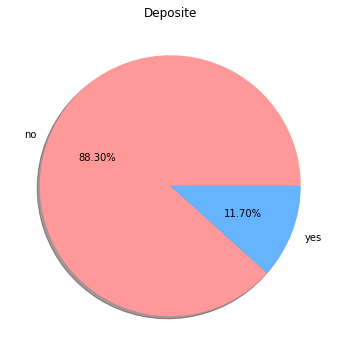

In [49]:
# pie plot 
plt.figure(figsize=(6,6))
colors = ['#ff9999','#66b3ff']
plt.pie(data.y.value_counts(),labels=data.y.value_counts().index,autopct='%1.2f%%',shadow = True,colors = colors)
plt.title('Deposite')
plt.show()

In [53]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

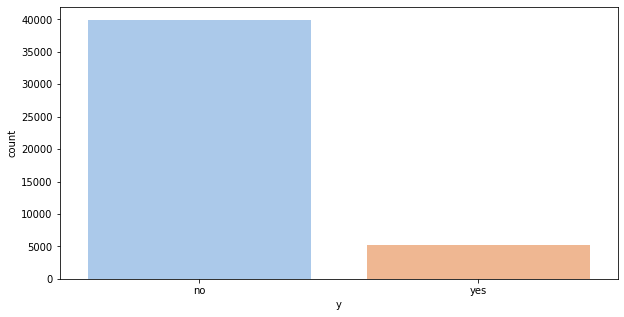

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data.y, ax=ax, palette='pastel')


**Observation** - Only 11.70% client subscribed  term deposit.

In [54]:
# Convert target variable into numeric
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

##***Correlation***

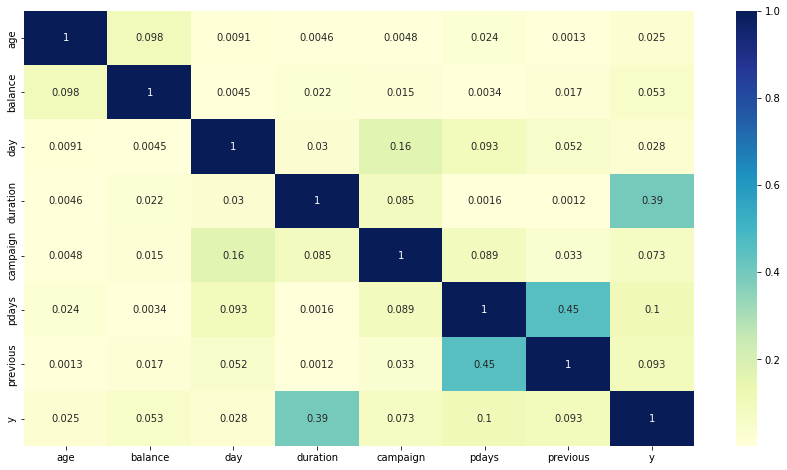

In [55]:
# Plotting correlation matrix
plt.subplots(figsize=(15,8))
sns.heatmap(data.corr().abs(), annot=True,cmap="YlGnBu")

***There is no variable highly correlated to y (Target variable).***


In [56]:
#dropping unnescessary column
data.drop(['marital'],axis=1, inplace=True)
data.drop(['contact'],axis=1, inplace=True)
data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,0


***Changing categorical variable to numerical variable***

In [57]:
data[['default','housing','loan']]=data[['default','housing','loan']].replace(["yes","no"],["1","0"])
data['month']=data['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
data['job']=data['job'].replace(['unknown'],['other'])

data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,0
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,0
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,0


In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['job']=le.fit_transform(data['job'])
data['education']=le.fit_transform(data['education'])
data['poutcome']=le.fit_transform(data['poutcome'])

data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0


# ***Outlier Treatment***

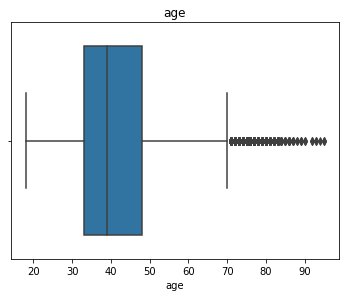

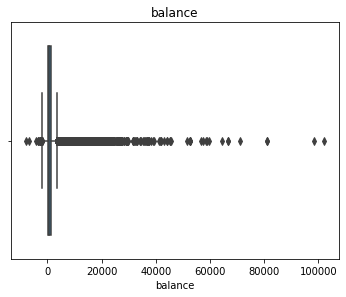

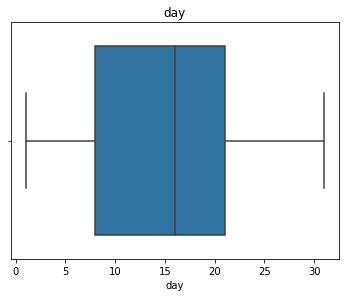

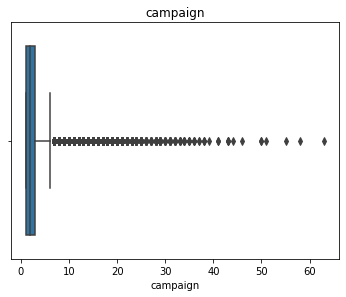

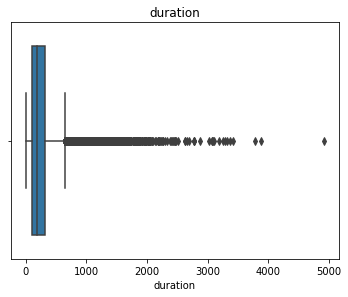

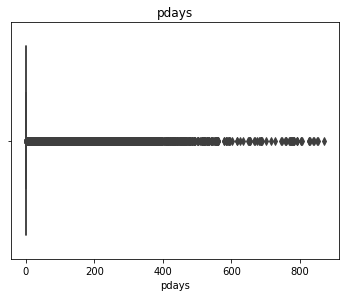

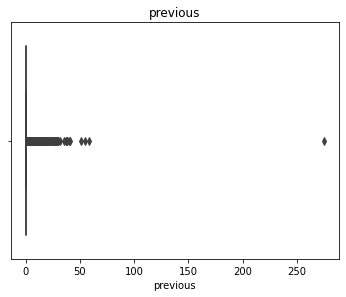

In [59]:
col=data[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()
  n=n+1

**Using Z score for outlier treatment**

In [60]:
from scipy import stats
z = np.abs(stats.zscore(data[['age','balance','duration','campaign','pdays','previous']]))
print(z)
data=data[(z<3).all(axis=1)]
data.shape

[[1.60696496 0.25641925 0.0110161  0.56935064 0.41145311 0.25194037]
 [0.28852927 0.43789469 0.41612696 0.56935064 0.41145311 0.25194037]
 [0.74738448 0.44676247 0.70736086 0.56935064 0.41145311 0.25194037]
 ...
 [2.92540065 1.42959305 3.37379688 0.72181052 1.43618859 1.05047333]
 [1.51279098 0.22802402 0.97014641 0.39902023 0.41145311 0.25194037]
 [0.37068857 0.52836436 0.39932797 0.24656035 1.4761376  4.52357654]]


(40209, 15)

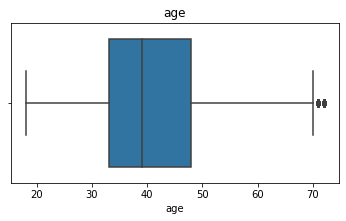

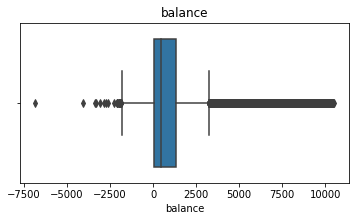

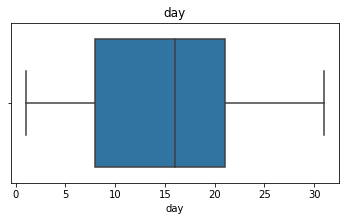

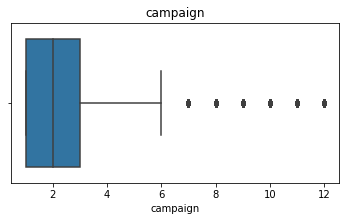

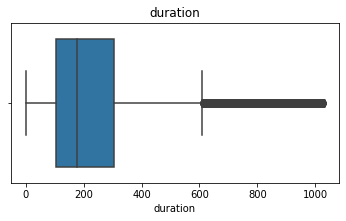

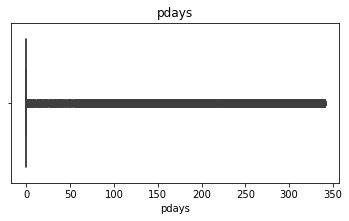

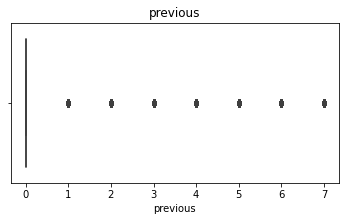

In [61]:
#checking outliers removed ot not
for i in col:
  plt.figure(figsize=(20,10))
  plt.subplot(3,3,1)
  sns.boxplot(data[i])
  plt.title(i)
plt.show()


#**Prepairing Dataset for Modeling**

In [67]:
#contain all  independent variabl
x=data.drop(['y'],axis=1)

#dependent variable
y=data['y']          


***Handling Inbalance data***

0    36155
1     4054
Name: y, dtype: int64


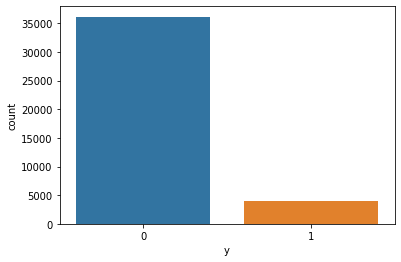

In [68]:
sns.countplot(x='y',data=data)
print(data['y'].value_counts())

In [69]:
# Using random over sampling
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
x_new,y_new=os.fit_resample(x,y)

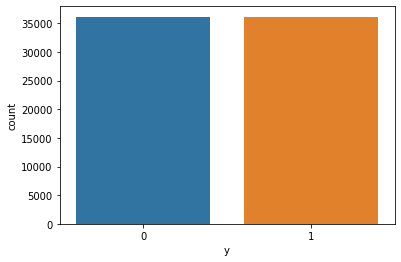

In [70]:
sns.countplot(y_new)

In [71]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))


Original dataset shape Counter({0: 36155, 1: 4054})
Resampled dataset shape Counter({0: 36155, 1: 36155})


#**Model**

In [72]:
#loading required libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_val_predict
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score, roc_curve, log_loss

In [73]:
#dividing the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.3,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(50617, 14) (21693, 14) (50617,) (21693,)


In [74]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [75]:
# Lets define a function for Evaluation metrics 
def print_metrics(actual,prediction,model=''):
  print(f'{model} Test accuracy Score', accuracy_score(actual,prediction))
  print(classification_report(actual,prediction))
  
  return confusion_matrix(actual,prediction)


***1.Logistic Regression***

In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 4000)
lr.fit(x_train,y_train)
cv_score = cross_val_score(lr,x_train,y_train,cv=5)

y_pred_lr=lr.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lr,'LogisticRegression')

Cross_validation score [0.78062031 0.79118925 0.79018078 0.77941322 0.79373703]
LogisticRegression Test accuracy Score 0.7964781265846126
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     10792
           1       0.81      0.78      0.79     10901

    accuracy                           0.80     21693
   macro avg       0.80      0.80      0.80     21693
weighted avg       0.80      0.80      0.80     21693



array([[8743, 2049],
       [2366, 8535]])

**2.Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_reg = RandomForestClassifier(max_depth = 8, n_estimators = 200)
rf_reg.fit(x_train,y_train)
cv_score = cross_val_score(rf_reg,x_train,y_train,cv=5)

y_pred_rf=rf_reg.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_rf,'RandomForest')

Cross_validation score [0.8562821  0.85736863 0.86002173 0.85537884 0.85725575]
RandomForest Test accuracy Score 0.8537316184944452
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     10792
           1       0.84      0.88      0.86     10901

    accuracy                           0.85     21693
   macro avg       0.85      0.85      0.85     21693
weighted avg       0.85      0.85      0.85     21693



array([[8954, 1838],
       [1335, 9566]])

***3.KNN***

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
cv_score = cross_val_score(knn,x_train,y_train,cv=5)

y_pred_knn=knn.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_knn,'KNN')

Cross_validation score [0.8945081  0.89401422 0.89726366 0.89024993 0.89528796]
KNN Test accuracy Score 0.9155487945420182
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10792
           1       0.87      0.98      0.92     10901

    accuracy                           0.92     21693
   macro avg       0.92      0.92      0.92     21693
weighted avg       0.92      0.92      0.92     21693



array([[ 9134,  1658],
       [  174, 10727]])

***4.SVC***

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=0)

svc.fit(x_train,y_train)
cv_score = cross_val_score(svc,x_train,y_train,cv=5)

y_pred_svc = svc.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_svc,'SVC')

Cross_validation score [0.84808376 0.84768866 0.84737726 0.84075867 0.84836511]
SVC Test accuracy Score 0.8493523256349975
              precision    recall  f1-score   support

           0       0.87      0.82      0.84     10792
           1       0.83      0.87      0.85     10901

    accuracy                           0.85     21693
   macro avg       0.85      0.85      0.85     21693
weighted avg       0.85      0.85      0.85     21693



array([[8892, 1900],
       [1368, 9533]])

***5.LGBM***

In [ ]:
#loading libraries
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate=0.1, max_depth= 25, n_estimators= 50)

lgbm.fit(x_train,y_train)
cv_score = cross_val_score(lgbm,x_train,y_train,cv=5)

y_pred_lgbm = lgbm.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lgbm,'LGBM')

Cross_validation score [0.87850652 0.87514816 0.8766176  0.87266621 0.87414798]
LGBM Test accuracy Score 0.8723090397824182
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     10792
           1       0.86      0.90      0.88     10901

    accuracy                           0.87     21693
   macro avg       0.87      0.87      0.87     21693
weighted avg       0.87      0.87      0.87     21693



array([[9140, 1652],
       [1118, 9783]])

**************************************************
Train AUC: 0.945
Test AUC: 0.940
**************************************************
Train Accuracy: 0.878
Test Accuracy: 0.872


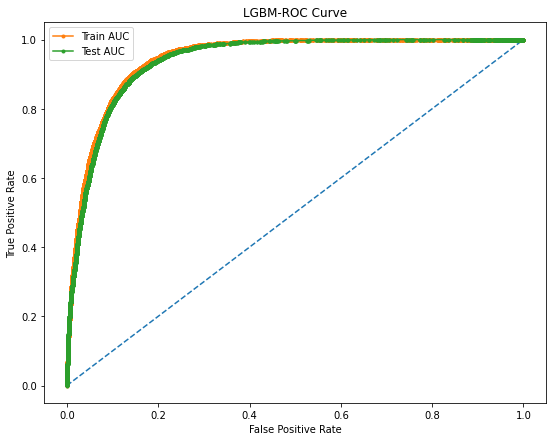

In [ ]:
y_probs_train = lgbm.predict_proba(x_train)
y_probs_test = lgbm.predict_proba(x_test)
y_predicted_train = lgbm.predict(x_train)
y_predicted_test = lgbm.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s=f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

#score['KNN (Over sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LGBM-ROC Curve")
plt.show()

***Hyperparameter Tunning of LGBM***

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,ShuffleSplit
lgbm_wt = LGBMClassifier(learning_rate=0.1, max_depth= 5, n_estimators= 150)


parameters=[{'learning_rate': [0.05, 0.1, 0.2 ,0.3 ,0.4], 'max_depth': range(3,8), 'n_estimators': range(30, 150, 10)}] 

lgbm_grid=RandomizedSearchCV(lgbm_wt,parameters,scoring='precision',cv=5,verbose=2)

lgbm_grid.fit(x_train,y_train)

y_pred_lgbm=lgbm_grid.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lgbm,'LGBM_Hypertunning')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=70; total time=   0.5s
[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=70; total time=   0.5s
[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=70; total time=   0.5s
[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=70; total time=   0.5s
[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=70; total time=   0.5s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=120; total time=   0.7s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=120; total time=   0.7s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=120; total time=   0.7s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=120; total time=   0.7s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=120; total time=   0.7s
[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=110; total time=   0.8s
[CV] END ..learning_rate=0.05, max_depth=7, n_es

array([[ 9599,  1193],
       [  502, 10399]])

## Comparing Models

In [78]:
from prettytable import PrettyTable

In [80]:
print('**** Comparison of  models for Class 1(Yes)  (oversampled train data)  ****')
table = PrettyTable(['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1_score'])
table.add_row(['Logistic regression', 0.7921, 0.81, 0.77, 0.79])
table.add_row(['Random Forest', 0.8597, 0.84, 0.88, 0.86])
table.add_row(['KNN', 0.9264, 0.87, 0.98, 0.92])
table.add_row(['SVC', 0.8493, 0.83, 0.87, 0.85])
table.add_row(['LGBM', 0.8723, 0.86, 0.90, 0.88])
table.add_row(['LGBM (Hyperparameter Tunned)', 0.9293, 0.90, 0.95, 0.92])


print(table)

**** Comparison of  models for Class 1(Yes)  (oversampled train data)  ****
+------------------------------+---------------+-----------+--------+----------+
|            Model             | Test Accuracy | Precision | Recall | F1_score |
+------------------------------+---------------+-----------+--------+----------+
|     Logistic regression      |     0.7921    |    0.81   |  0.77  |   0.79   |
|        Random Forest         |     0.8597    |    0.84   |  0.88  |   0.86   |
|             KNN              |     0.9264    |    0.87   |  0.98  |   0.92   |
|             SVC              |     0.8493    |    0.83   |  0.87  |   0.85   |
|             LGBM             |     0.8723    |    0.86   |  0.9   |   0.88   |
| LGBM (Hyperparameter Tunned) |     0.9293    |    0.9    |  0.95  |   0.92   |
+------------------------------+---------------+-----------+--------+----------+


**Thus, we can conclude that Light GBM and KNN  is showing the best score among them.**


# ***Conclusion***



*   Blue-collar, management and technician showed maximum interest in subscription.
*   Divorce people have no interest in term deposit.
*   People with secondary and tertiary education were more driven towards paying term deposit in bank.

*   Generally people who don't have credit in default are interested in deposit.
Majority of the people have home loan but only few of them opted for term deposit.


*   Cellular communication is more effective in comparison to other communication types.

*   There were maximum subscriptions in Summer season.

*   The calls with large duration has more tendency for conversion.
People were mostly contacted only once.

*   Majority of people were not contacted previously before this campaign and there are no significant contacts after 11 times already done.

*   Success rate is high for unknown poutcome.

*   We can choose our model either Light GBM or KNN to predict Effectiveness as they both are showing best results.





